In [11]:
from ucimlrepo import fetch_ucirepo 
from sklearn.datasets import fetch_openml

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from utils import *
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

No resampling

In [21]:
def metric_list(y_test,y_preds,y_scores,num_of_classes):
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds, average='weighted')
    recall = recall_score(y_test, y_preds, average='weighted')
    f1 = f1_score(y_test, y_preds, average='weighted')
    Macro_Averaged =macro_averaged_auprc(y_true=y_test,y_scores=y_scores,n_classes=num_of_classes)
    F_measure = f_measure(y_test,y_preds,beta=10)
    Modified_mcc = mmcc(y_true=y_test,y_pred=y_preds,classes=range(num_of_classes))
    MCC_metric = matthews_corrcoef(y_test,y_preds)
    Gmean = np.prod(g_mean_multiclass(y_true=y_test,y_pred=y_preds,n_classes=num_of_classes)[1][1::])

    score_list = [accuracy,precision,recall,f1,Macro_Averaged,F_measure,Modified_mcc,MCC_metric,Gmean]
    return score_list

In [3]:
data = fetch_openml(data_id=40672)

In [9]:
x = data.data
y = data.target

In [12]:
categorical_columns = x.select_dtypes(include=['category']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    x[col] = label_encoder.fit_transform(x[col])

In [18]:
num_of_classes=np.unique(y).size

In [19]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=42)
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_features=2, max_depth=5, random_state=42)

In [23]:
clf.fit(X_train, y_train) 
        
y_preds = clf.predict(X_test) 
y_scores = clf.predict_proba(X_test)

score_p = metric_list(y_test,y_preds,y_scores,num_of_classes)

In [26]:
score = {
    'FARs' : score_p
}

In [27]:
df = pd.DataFrame.from_dict(score, orient='index',columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])


In [28]:
df

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
FARs,0.332475,0.410267,0.332475,0.344689,0.5,0.338307,0.0,0.146081,9.136861e-07


In [34]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_preds)
conf_mat

array([[   0,    0,    1,    0,    1,    0,    0,    0],
       [ 784, 5002,  196,   71,  172, 1064, 1059,  125],
       [ 512,  491,  651,    3,   63,  483,  807,   51],
       [  11,   15,   13,    2,   14,    7,   12,    5],
       [ 313, 1529,  457,   29,  210,  550,  747,  154],
       [ 451,  487,  549,    2,   65,  452,  700,   37],
       [ 214,  438,  320,    1,   46,  241,  371,   42],
       [   6,   45,    4,    3,    1,   10,   79,   26]], dtype=int64)

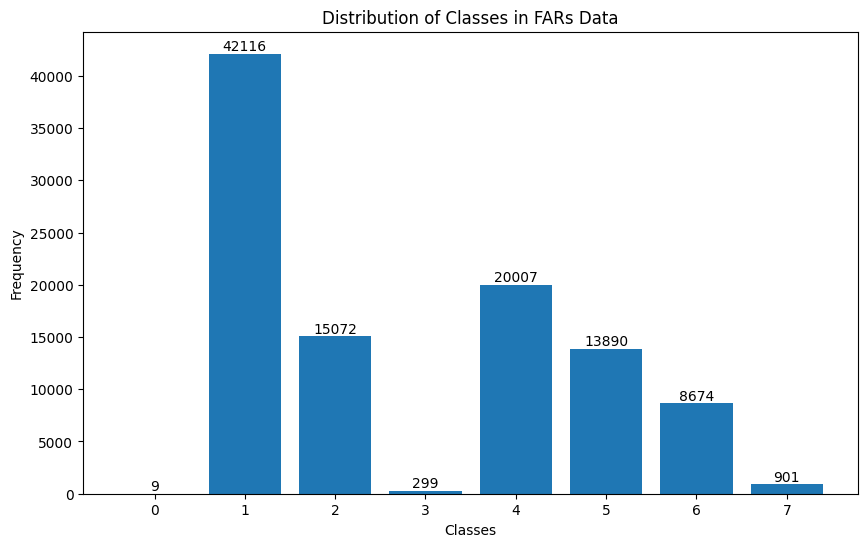

In [53]:
counts = y.value_counts().sort_index()
class_names = counts.index.tolist()
class_values = counts.values.tolist()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, class_values)
for bar, value in zip(bars, class_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
             ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in FARs Data')
plt.show()

under sampling using TomekLinks

In [83]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(random_state = 42)
x_tl, y_tl = tl.fit_resample(x, y)

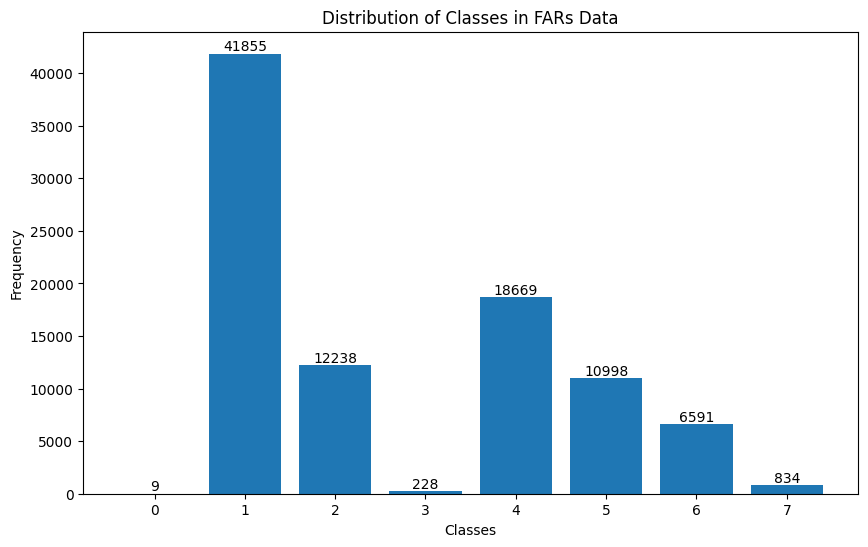

In [84]:
counts = y_tl.value_counts().sort_index()
class_names = counts.index.tolist()
class_values = counts.values.tolist()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, class_values)
for bar, value in zip(bars, class_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
             ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in FARs Data')
plt.show()

In [85]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl =train_test_split(x_tl,y_tl,test_size=0.2,random_state=42)
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_features=2, max_depth=5, random_state=42)
clf.fit(X_train_tl, y_train_tl) 
        
y_preds_tl = clf.predict(X_test_tl) 
y_scores_tl = clf.predict_proba(X_test_tl)

score_p_tl = metric_list(y_test_tl,y_preds_tl,y_scores_tl,num_of_classes)


In [86]:
score_tl = {
    'FARs' : score_p_tl
}

In [87]:
df_tl = pd.DataFrame.from_dict(score_tl, orient='index',columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])


In [88]:
df_tl

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
FARs,0.377085,0.383009,0.377085,0.366877,0.5,0.377616,0.0,0.144371,7.376723e-08


In [89]:
conf_mat_tl = confusion_matrix(y_true=y_test_tl, y_pred=y_preds_tl)
conf_mat_tl

array([[   0,    0,    0,    0,    1,    0,    2,    0],
       [  16, 5507,  255,   50, 1000,  381, 1112,  140],
       [   0, 1083,   63,   10,  383,  162,  768,    0],
       [   0,   15,    2,    1,    5,   14,    9,    1],
       [   2,  847,   93,   70,  524,  471, 1621,    1],
       [   0,  712,   36,   19,  341,  201,  828,    1],
       [   0,  361,   31,   21,  210,  152,  593,    1],
       [   0,   15,    0,    0,   72,   37,   39,    6]], dtype=int64)

over sampling using SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_sm, y_sm = smote.fit_resample(x, y)

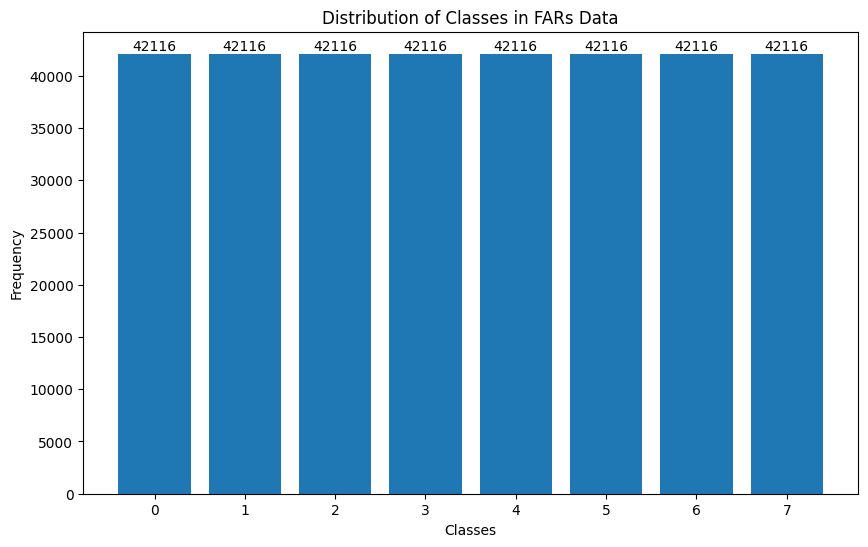

In [62]:
counts = y_sm.value_counts().sort_index()
class_names = counts.index.tolist()
class_values = counts.values.tolist()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, class_values)
for bar, value in zip(bars, class_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
             ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in FARs Data')
plt.show()

In [66]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm =train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_features=2, max_depth=5, random_state=42)
clf.fit(X_train_sm, y_train_sm) 
        
y_preds_sm = clf.predict(X_test_sm) 
y_scores_sm = clf.predict_proba(X_test_sm)

score_p_sm = metric_list(y_test_sm,y_preds_sm,y_scores_sm,num_of_classes)


In [67]:
score_sm = {
    'FARs' : score_p_sm
}

In [71]:
df_sm = pd.DataFrame.from_dict(score_sm, orient='index',columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])


In [72]:
df_sm

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
FARs,0.790075,0.787658,0.790075,0.7829,0.5,0.789855,0.0,0.761984,0.09539


In [73]:
conf_mat_sm = confusion_matrix(y_true=y_test_sm, y_pred=y_preds_sm)
conf_mat_sm

array([[8411,    0,    0,    0,    0,    0,    0,    0],
       [   0, 8490,    0,    0,    0,    0,    0,   15],
       [   0,    1, 4926,  136,    7, 2888,  493,   10],
       [   0,    0,  105, 7992,   38,  149,   71,   31],
       [  24,    0,    0,    7, 7841,    9,  261,  285],
       [   2,    0, 2147,  195,  264, 4731, 1034,   32],
       [  12,    0,  836,  204, 2088, 2291, 2925,   70],
       [   1,    1,    1,   28,  272,   13,  125, 7924]], dtype=int64)

Over-sampling followed by under-sampling using SMOTETomek

In [92]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state = 42)
x_smt, y_smt = smt.fit_resample(x, y)

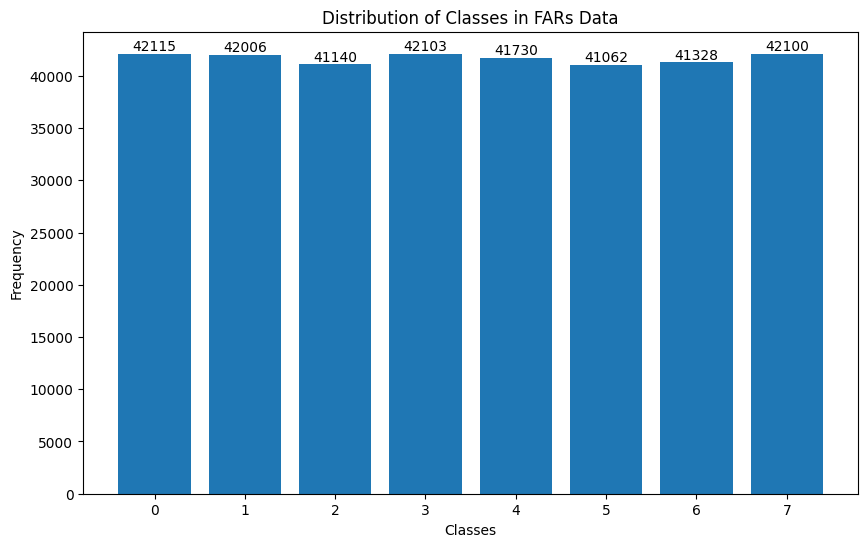

In [93]:
counts = y_smt.value_counts().sort_index()
class_names = counts.index.tolist()
class_values = counts.values.tolist()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, class_values)
for bar, value in zip(bars, class_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
             ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in FARs Data')
plt.show()

In [94]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt =train_test_split(x_smt,y_smt,test_size=0.2,random_state=42)
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_features=2, max_depth=5, random_state=42)
clf.fit(X_train_smt, y_train_smt) 
        
y_preds_smt = clf.predict(X_test_smt) 
y_scores_smt = clf.predict_proba(X_test_smt)

score_p_smt = metric_list(y_test_smt,y_preds_smt,y_scores_smt,num_of_classes)


In [95]:
score_smt = {
    'FARs' : score_p_smt
}

In [96]:
df_smt = pd.DataFrame.from_dict(score_smt, orient='index',columns=['accuracy', 'precision', 'recall', 'f1','Macro-Averaged AUPRC',
                                                            'F_measure Beta=10','Modified mcc','MCC metirc','Gmean'])


In [97]:
df_smt

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
FARs,0.793021,0.789927,0.793021,0.785639,0.5,0.792739,0.0,0.765195,0.097342


In [98]:
conf_mat_smt = confusion_matrix(y_true=y_test_smt, y_pred=y_preds_smt)
conf_mat_smt

array([[8436,    0,    0,    0,    0,    0,    0,    0],
       [   0, 8262,    0,    0,    1,    0,    0,    9],
       [   0,    1, 4943,  144,   13, 2694,  439,   16],
       [   0,    0,  101, 8066,   47,  167,   86,   33],
       [  18,    0,    0,   12, 7816,   14,  241,  245],
       [   4,    0, 2206,  205,  260, 4676, 1026,   45],
       [   6,    0,  838,  220, 2034, 2180, 2853,   67],
       [   1,    1,    4,   32,  282,   15,  102, 7856]], dtype=int64)